<Axes: xlabel='company,job,degree,salary_more_then_100k'>

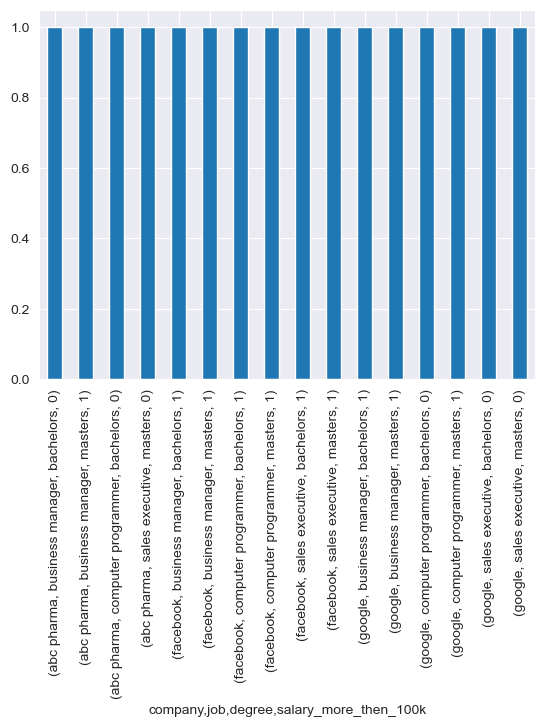

In [116]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

import seaborn as sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('/Users/hopper/Downloads/salaries.csv')
df.dropna(inplace=True)
df.value_counts().plot(kind='bar')

In [117]:
y1 = df['salary_more_then_100k']
x1 = df.drop(['salary_more_then_100k'], axis=1)


In [118]:
x

array([[0., 0., 1., 0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 0., 1., 0., 1.],
       [0., 0., 1., 1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0., 0., 1.]])

In [119]:
y

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k_n, dtype: int64

In [120]:
#label encoding
le=LabelEncoder()
df['company_n']=le.fit_transform(df['company'])
df['job_n']=le.fit_transform(df['job'])
df['degree_n']=le.fit_transform(df['degree'])
df['salary_more_then_100k_n']=le.fit_transform(df['salary_more_then_100k'])
df

,company,job,degree,salary_more_then_100k,company_n,job_n,degree_n,salary_more_then_100k_n
0,google,sales executive,bachelors,0,2,2,0,0
1,google,sales executive,masters,0,2,2,1,0
2,google,business manager,bachelors,1,2,0,0,1
3,google,business manager,masters,1,2,0,1,1
4,google,computer programmer,bachelors,0,2,1,0,0
5,google,computer programmer,masters,1,2,1,1,1
6,abc pharma,sales executive,masters,0,0,2,1,0
7,abc pharma,computer programmer,bachelors,0,0,1,0,0
8,abc pharma,business manager,bachelors,0,0,0,0,0
9,abc pharma,business manager,masters,1,0,0,1,1


In [121]:
x = df.drop(['salary_more_then_100k','company','job','degree','salary_more_then_100k_n'], axis=1)
y = df['salary_more_then_100k_n']


In [122]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [123]:
clf = DecisionTreeClassifier()
clf.fit(x,y)
clf.predict([[2,0,1]])


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [124]:
pd.concat([x,y],axis=1)

,company_n,job_n,degree_n,salary_more_then_100k_n
0,2,2,0,0
1,2,2,1,0
2,2,0,0,1
3,2,0,1,1
4,2,1,0,0
5,2,1,1,1
6,0,2,1,0
7,0,1,0,0
8,0,0,0,0
9,0,0,1,1


In [125]:
y_pred = clf.predict(x_test)

In [126]:
y_pred

array([0, 0, 1, 1])

In [127]:
y_test

0     0
1     0
5     1
14    1
Name: salary_more_then_100k_n, dtype: int64

In [128]:
accuracy_score(y_test, y_pred)

1.0

In [129]:
plt.figure(figsize=(15,10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

[Text(0.36363636363636365, 0.9166666666666666, 'x[0] <= 0.5\ngini = 0.469\nsamples = 16\nvalue = [6, 10]'),
 Text(0.18181818181818182, 0.75, 'x[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.09090909090909091, 0.5833333333333334, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.2727272727272727, 0.5833333333333334, 'x[1] <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.18181818181818182, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.36363636363636365, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5454545454545454, 0.75, 'x[0] <= 1.5\ngini = 0.375\nsamples = 12\nvalue = [3, 9]'),
 Text(0.45454545454545453, 0.5833333333333334, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.6363636363636364, 0.5833333333333334, 'x[1] <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.5454545454545454, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.7272727272727273, 0.4166666666666667, 'x

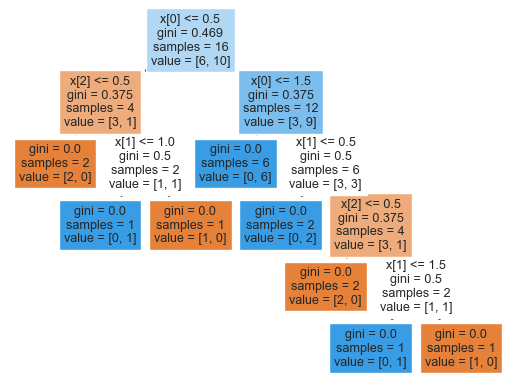

In [130]:
tree.plot_tree(clf, filled=True)

In [131]:
#random forest
from sklearn.ensemble import RandomForestClassifier

In [132]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)


RandomForestClassifier()

In [133]:
y_pred = clf.predict(x_test)

In [134]:
clf.predict([[2,0,1]])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [135]:
accuracy_score(y_test, y_pred)

0.5

In [136]:
#naive bayes

In [137]:
from sklearn.naive_bayes import GaussianNB

In [138]:
clf = GaussianNB()
clf.fit(x_train, y_train)

GaussianNB()

In [139]:
y_pred = clf.predict(x_test)

In [140]:
clf.predict([[2,0,1]])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1])

In [141]:
#svm
from sklearn.svm import SVC

In [142]:
clf = SVC()
clf.fit(x_train, y_train)

SVC()

In [143]:
y_pred = clf.predict(x_test)

In [144]:
clf.predict([[2,0,1]])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1])

In [145]:
accuracy_score(y_test, y_pred)

0.5

In [146]:
#knn
from sklearn.neighbors import KNeighborsClassifier


In [147]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [148]:
y_pred = clf.predict(x_test)

In [149]:
clf.predict([[2,1,1]])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

In [161]:
#column transformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


In [169]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [170]:
df=pd.read_csv('/Users/hopper/Downloads/covid_toy.csv')
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [177]:
transformer = ColumnTransformer(transformers=[
    ('tnf1', SimpleImputer(), ['fever']),
    ('tnf2', OneHotEncoder(categories=[['Mild', 'Strong']]), ['cough']),
    ('tnf3', OneHotEncoder(sparse=False,drop='first'), ['gender', 'city'])
    ], remainder='passthrough')

In [178]:
pd.concat([df, pd.DataFrame(transformer.fit_transform(df))], axis=1)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,age,gender,fever,cough,city,has_covid,0,1,2,3,4,5,6,7,8
0,60,Male,103.0,Mild,Kolkata,No,103.0,1.0,0.0,1.0,0.0,1.0,0.0,60,No
1,27,Male,100.0,Mild,Delhi,Yes,100.0,1.0,0.0,1.0,1.0,0.0,0.0,27,Yes
2,42,Male,101.0,Mild,Delhi,No,101.0,1.0,0.0,1.0,1.0,0.0,0.0,42,No
3,31,Female,98.0,Mild,Kolkata,No,98.0,1.0,0.0,0.0,0.0,1.0,0.0,31,No
4,65,Female,101.0,Mild,Mumbai,No,101.0,1.0,0.0,0.0,0.0,0.0,1.0,65,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,12,Female,104.0,Mild,Bangalore,No,104.0,1.0,0.0,0.0,0.0,0.0,0.0,12,No
96,51,Female,101.0,Strong,Kolkata,Yes,101.0,0.0,1.0,0.0,0.0,1.0,0.0,51,Yes
97,20,Female,101.0,Mild,Bangalore,No,101.0,1.0,0.0,0.0,0.0,0.0,0.0,20,No
98,5,Female,98.0,Strong,Mumbai,No,98.0,0.0,1.0,0.0,0.0,0.0,1.0,5,No
